In [0]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

In [0]:
sns.set()

In [0]:
values = stats.norm.rvs(size=10_000)

In [0]:
ecdf = ECDF(values)

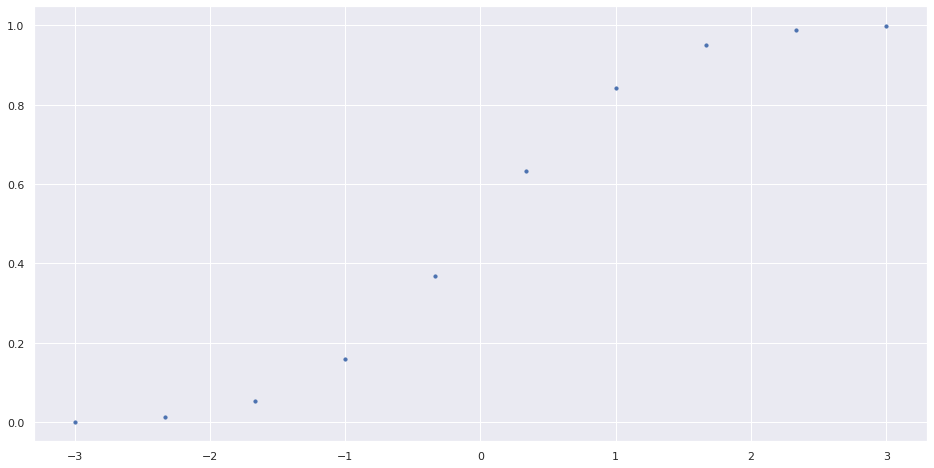

In [129]:
figure = plt.figure(figsize=[16, 8])

n_steps = 10
plt.scatter(np.linspace(-3, 3, n_steps), ecdf(np.linspace(-3, 3, n_steps)), s=10)

In [0]:
class EmpiricalCumulativeDistribution:
    def __init__(self, rvs):
        self.cdf = rvs

    def __call__(self, x):
        return np.sum(np.where(x >= self.cdf)[0].shape[0]) / self.cdf.shape[0]

In [0]:
distribution_object = EmpiricalCumulativeDistribution(stats.norm.rvs(size=1000))

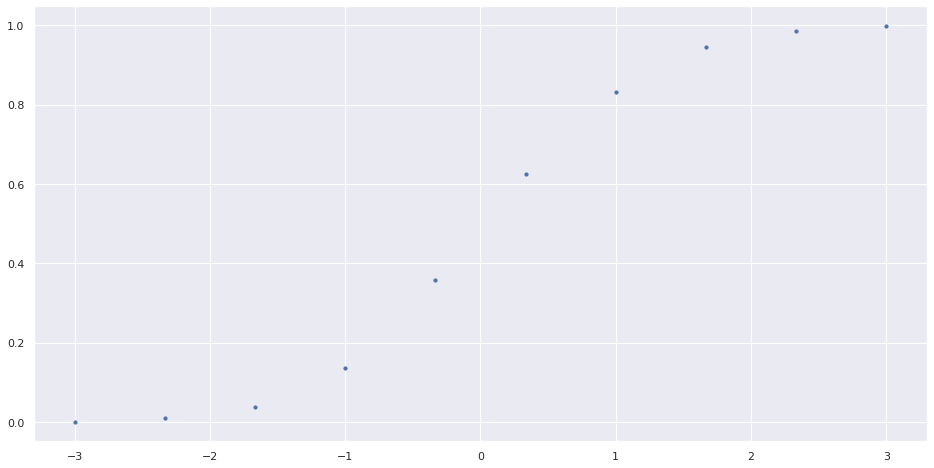

In [136]:
figure = plt.figure(figsize=[16, 8])

result = [distribution_object(x) for x in np.linspace(-3, 3, 10)]
plt.scatter(np.linspace(-3, 3, 10), result, s=10)

In [126]:
print(distribution_object(-5.0))
print(distribution_object(0.0))
print(distribution_object(5.0))

0.0
-0.39253751377654467
0.025685656277389772


In [133]:
np.where(5.0 >= distribution_object.cdf)[0].shape[0]

1000

In [0]:
class ECDF:
    """

    """
    def __init__(self, pdf: np.array):
        """
        :param pdf:
        """
        self.density = np.sort(pdf)

    def _get_value(self, x):
        """

        :param x:
        :return:
        """
        # np.where works like indicator function
        return np.sum(np.where(x >= self.density)[0].shape[0]) / self.density.shape[0]

    def __call__(self, x):
        """

        :param x:
        :return:
        """
        return np.vectorize(self._get_value)(x)

In [0]:
ecdf = ECDF(stats.norm.rvs(size=1000))